### Import Libraries

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
import seaborn as sns
sns.set()

### Load the data

In [37]:
raw_data = pd.read_csv("1.04. Real-life example.csv")

### Explore the data

In [38]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [39]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Preprocessing

### Deal with missing values

In [40]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [41]:
#Deleting entries is not always recommended, its ok though if the deleted entries are less than 5% of the overall data
#Delete Rows with Null Values 
data_no_null = raw_data.dropna(axis= 0) 

### Deal with outliers

#### Check the outliers in the numerical data

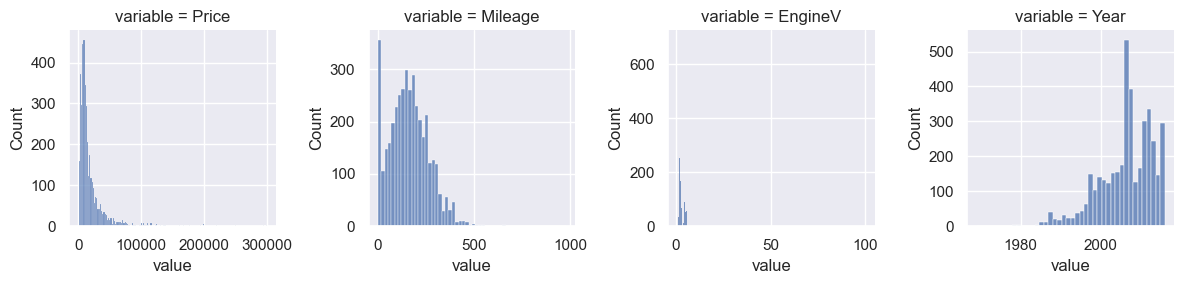

In [42]:
# Reshape data for FacetGrid
melted_data = data_no_null.melt(var_name='variable', value_name='value', value_vars=['Price', 'Mileage', 'EngineV' , 'Year'])

# Create FacetGrid
g = sns.FacetGrid(melted_data, col="variable", sharex=False, sharey=False)
g.map(sns.histplot, "value")

# Show plot
plt.show()


In [43]:
# Outlier detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(data_no_null[['Price' , 'Mileage' , 'EngineV' , 'Year']])
data_no_outliers = data_no_null[outliers != -1]  # Remove outliers

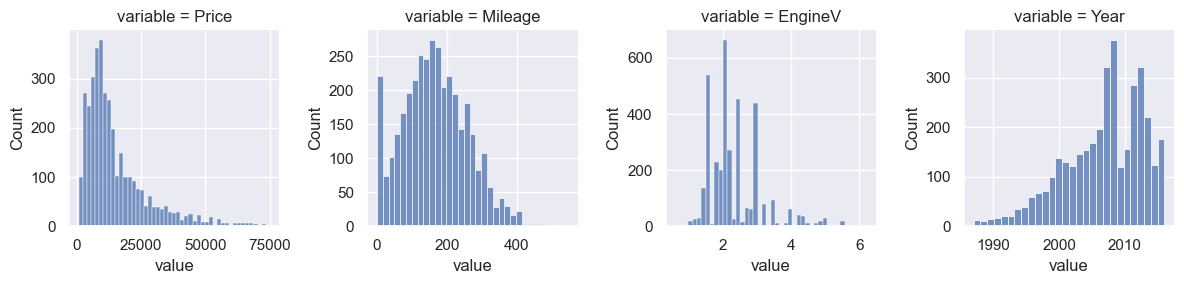

In [44]:
#Plot the data after removing the outliers

melted_data = data_no_outliers.melt(var_name='variable', value_name='value', value_vars=['Price', 'Mileage', 'EngineV' , 'Year'])

g = sns.FacetGrid(melted_data, col="variable", sharex=False, sharey=False)
g.map(sns.histplot, "value")

plt.show()


In [45]:
data_no_outliers.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3622,3622.000000,3622,3622.000000,3622.000000,3622,3622,3622.000000,3622
unique,7,NaN,6,NaN,NaN,4,2,NaN,263
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,837,NaN,1380,NaN,NaN,1707,3260,NaN,177
mean,NaN,15200.491195,NaN,166.008283,2.346168,NaN,NaN,2006.568470,NaN
std,NaN,12512.002029,NaN,92.354698,0.814808,NaN,NaN,5.827269,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1987.000000,NaN
25%,NaN,7000.000000,NaN,100.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11000.000000,NaN,161.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,19200.000000,NaN,230.000000,2.800000,NaN,NaN,2011.000000,NaN


In [46]:
data_cleaned = data_no_outliers.reset_index(drop=True)

## Check the OLS assumptions

### Linearity

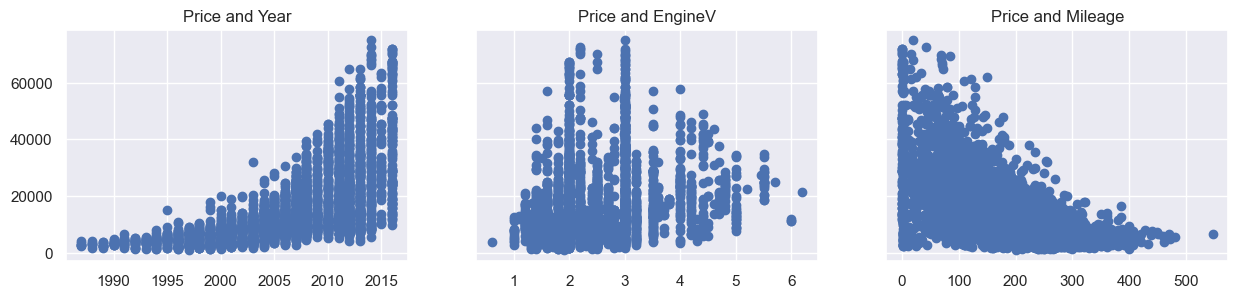

In [49]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

As shown in the plots, the relationship between the "Price" and the other variables is not linear

to achieve the linearity, we can transform the data using "log transformation"

In [51]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
3,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
4,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320,8.716044


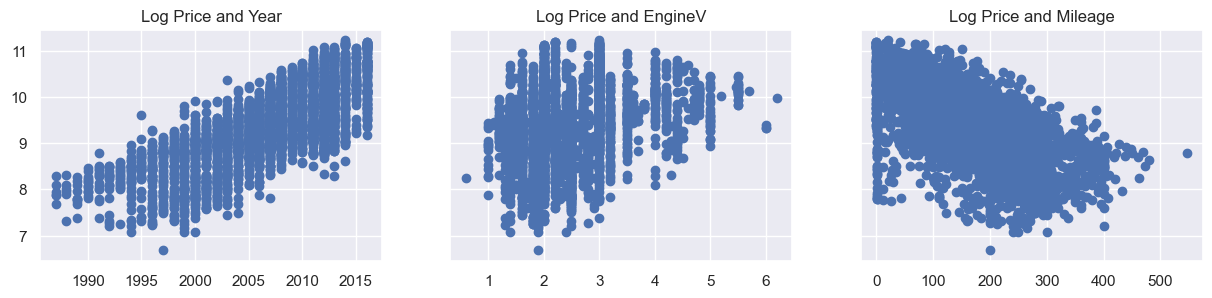

In [52]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [53]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [54]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [56]:
vif

,VIF,features
0,4.247330,Mileage
1,11.512310,Year
2,9.380561,EngineV


 if VIF is greater than 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

 Dropping the "Year" variable will drive the VIF of other variables down.

In [57]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_no_multicollinearity[['Mileage','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [59]:
vif

,VIF,features
0,3.422665,Mileage
1,3.422665,EngineV


## Working with categorical data

### Create dummy variables

In [60]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity

In [61]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.0,8.342840,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,2.9,8.974618,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,240,4.2,10.043249,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,120,2.0,9.814656,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,438,2.0,8.716044,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Regression Model

### Target and Input

In [62]:
target = data_with_dummies['log_price']

input = data_with_dummies.drop(['log_price'] , axis= 1) #axis = 1 -> drop the column

### Scale the data

In [64]:
from sklearn.preprocessing import StandardScaler

scale  = StandardScaler()

scale.fit(input)

StandardScaler()

In [65]:
scaled_input = scale.transform(input)

### Split the data

In [68]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_input , target , test_size= 0.2 , random_state=47)

### Create the regression

In [69]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

In [70]:
y_hat = reg.predict(x_train)

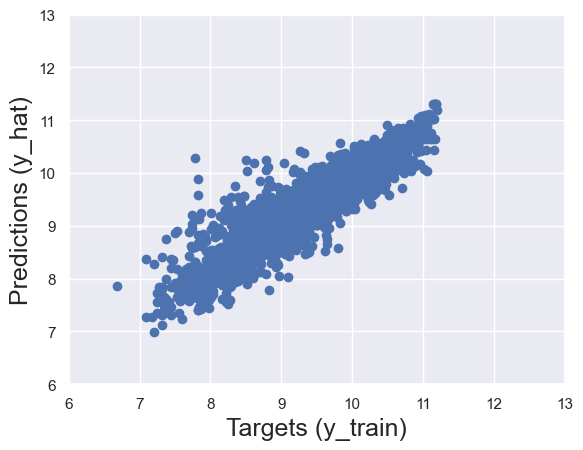

In [71]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

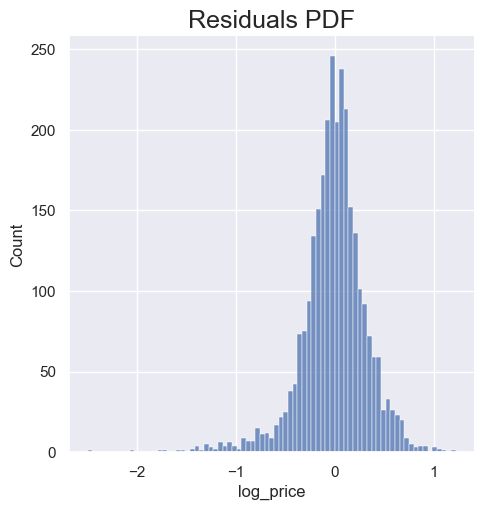

In [73]:
sns.displot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

In [74]:
reg.score(x_train,y_train)

0.8235010271570364

### Wights and Bias

In [75]:
reg.intercept_

-303243116142.14606

In [76]:
reg.coef_

array([-3.36726105e-01, -9.38829624e-03,  1.35612277e+12,  1.40891965e+12,
        2.11866314e+12, -7.23786046e+11, -6.90746960e+12, -1.66051622e+13,
       -3.99508075e-02,  4.93258163e-03, -1.99699700e-02, -3.42646701e-02,
        1.32763153e-02, -1.09148328e-01, -2.86281437e-02, -1.22238933e-01,
        3.22279427e-01,  2.12792829e+11,  3.53789270e-02,  4.55644021e-02,
       -1.34631481e-02,  9.87346598e+10,  5.36237860e-03,  1.62534205e-02,
        2.08654882e-02,  3.62605903e-02,  6.35649508e-03,  1.23838605e-02,
        2.08519757e-02,  6.31626930e-02,  1.08834637e-01,  9.04989386e-03,
        1.38696799e-02,  3.94897461e-02,  5.52978516e-02,  3.21044922e-02,
       -2.15517866e+12,  2.89306641e-02,  4.07133098e+11,  2.11181641e-02,
        4.51660156e-02,  1.65496826e-01,  5.78613281e-02, -5.03540039e-03,
        6.97784424e-02,  5.82275391e-02,  1.29882812e-01,  6.42493963e-02,
        3.17382812e-02,  1.47897131e+12,  3.00674438e-02,  1.97753906e-02,
        5.02929688e-02,  

In [78]:
reg_summary = pd.DataFrame(input.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.367261e-01
1,EngineV,-9.388296e-03
2,Brand_BMW,1.356123e+12
3,Brand_Mercedes-Benz,1.408920e+12
4,Brand_Mitsubishi,2.118663e+12
...,...,...
274,Model_X6,1.607971e-01
275,Model_X6 M,4.492188e-02
276,Model_Yaris,1.465505e+12
277,Model_Z3,1.292419e-02


In [79]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Testing

In [80]:
y_hat_test = reg.predict(x_test)

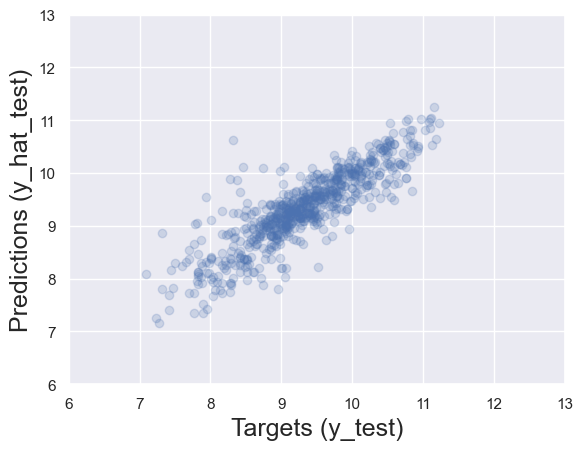

In [81]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [82]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

C:\Users\Ahmad_AZ\AppData\Local\Temp\ipykernel_5316\1168990217.py:1: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


,Prediction
0,7519.327115
1,27157.583938
2,38093.179424
3,2496.619438
4,8898.953503


In [83]:
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0     8.922658
1     9.836279
2    10.357743
3     7.467371
4     9.453287
Name: log_price, dtype: float64

In [84]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,7519.327115,7500.0
1,27157.583938,18700.0
2,38093.179424,31500.0
3,2496.619438,1750.0
4,8898.953503,12750.0
...,...,...
720,6609.912423,8000.0
721,7607.962564,5900.0
722,37520.915705,49999.0
723,13171.080167,13000.0


In [85]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [86]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,7519.327115,7500.0,-19.327115,0.257695
1,27157.583938,18700.0,-8457.583938,45.227722
2,38093.179424,31500.0,-6593.179424,20.930728
3,2496.619438,1750.0,-746.619438,42.663968
4,8898.953503,12750.0,3851.046497,30.204286
...,...,...,...,...
720,6609.912423,8000.0,1390.087577,17.376095
721,7607.962564,5900.0,-1707.962564,28.948518
722,37520.915705,49999.0,12478.084295,24.956668
723,13171.080167,13000.0,-171.080167,1.316001


In [87]:
df_pf.describe()

c:\Users\Ahmad_AZ\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Ahmad_AZ\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Ahmad_AZ\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Prediction,Target,Residual,Difference%
count,7.250000e+02,725.000000,7.250000e+02,725.000000
mean,inf,15074.971310,-inf,inf
std,NaN,12621.907001,NaN,NaN
min,0.000000e+00,1200.000000,-inf,0.004781
25%,7.645202e+03,7000.000000,-2.209115e+03,9.480048
50%,1.131544e+04,10900.000000,-1.710802e+02,20.277040
75%,1.861051e+04,18600.000000,1.868536e+03,38.076078
max,inf,75000.000000,5.222200e+04,inf


In [88]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
194,10000.48,10000.00,-0.48,0.00
652,9496.04,9500.00,3.96,0.04
619,22122.12,22100.00,-22.12,0.10
704,3094.98,3100.00,5.02,0.16
59,5759.64,5750.00,-9.64,0.17
406,10818.38,10800.00,-18.38,0.17
20,4009.11,4000.00,-9.11,0.23
0,7519.33,7500.00,-19.33,0.26
110,27078.14,27000.00,-78.14,0.29
506,35110.22,35000.00,-110.22,0.31
